In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("CAR PRICE PREDICTION - MACHINE LEARNING MODEL")
print("="*80)

CAR PRICE PREDICTION - MACHINE LEARNING MODEL


In [ ]:
print("\n[STEP 1] Loading Dataset...")

# Load the dataset
df = pd.read_csv('car_data.csv')

print(f"✓ Dataset loaded successfully!")
print(f"  Original shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nAll available columns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")


[STEP 1] Loading Dataset...
✓ Dataset loaded successfully!
  Original shape: (205, 26)

First 5 rows:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.

In [ ]:
print("\n" + "="*80)
print("[STEP 2] Selecting Important Features...")
print("="*80)

# Select only the most important columns for prediction
selected_columns = [
    'CarName',           # Car brand/model name
    'fueltype',          # Fuel type (gas/diesel)
    'carbody',           # Body style (sedan, hatchback, etc.)
    'doornumber',        # Number of doors
    'enginesize',        # Engine size in cc
    'horsepower',        # Engine horsepower
    'peakrpm',           # Peak RPM
    'citympg',           # City mileage
    'price'              # Target variable (selling price)
]

# Create dataframe with selected columns
df_selected = df[selected_columns].copy()

print(f"\n✓ Selected {len(selected_columns)} important columns:")
for i, col in enumerate(selected_columns, 1):
    print(f"  {i}. {col}")

print(f"\nNew dataset shape: {df_selected.shape}")


[STEP 2] Selecting Important Features...

✓ Selected 9 important columns:
  1. CarName
  2. fueltype
  3. carbody
  4. doornumber
  5. enginesize
  6. horsepower
  7. peakrpm
  8. citympg
  9. price

New dataset shape: (205, 9)


In [ ]:
print("\n" + "="*80)
print("[STEP 3] Exploratory Data Analysis...")
print("="*80)

print("\n--- Dataset Information ---")
print(df_selected.info())

print("\n--- Missing Values ---")
missing = df_selected.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("✓ No missing values found!")

print("\n--- Statistical Summary ---")
print(df_selected.describe())

print("\n--- Unique Values in Categorical Columns ---")
categorical_cols = ['CarName', 'fueltype', 'carbody', 'doornumber']
for col in categorical_cols:
    print(f"\n{col}: {df_selected[col].nunique()} unique values")
    print(f"  Values: {df_selected[col].unique()[:10]}")  # Show first 10


[STEP 3] Exploratory Data Analysis...

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarName     205 non-null    object 
 1   fueltype    205 non-null    object 
 2   carbody     205 non-null    object 
 3   doornumber  205 non-null    object 
 4   enginesize  205 non-null    int64  
 5   horsepower  205 non-null    int64  
 6   peakrpm     205 non-null    int64  
 7   citympg     205 non-null    int64  
 8   price       205 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 14.5+ KB
None

--- Missing Values ---
CarName       0
fueltype      0
carbody       0
doornumber    0
enginesize    0
horsepower    0
peakrpm       0
citympg       0
price         0
dtype: int64
✓ No missing values found!

--- Statistical Summary ---
       enginesize  horsepower      peakrpm     citympg         price
cou

In [ ]:
print("\n" + "="*80)
print("[STEP 4] Data Preprocessing...")
print("="*80)

# Extract car brand from CarName
print("\n→ Extracting car brand from CarName...")
df_selected['CarBrand'] = df_selected['CarName'].str.split().str[0]
print(f"  ✓ Extracted {df_selected['CarBrand'].nunique()} unique brands")
print(f"  Brands: {sorted(df_selected['CarBrand'].unique())}")

# Drop original CarName column
df_selected = df_selected.drop(['CarName'], axis=1)

# Initialize label encoders
print("\n→ Encoding categorical variables...")
le_fuel = LabelEncoder()
le_body = LabelEncoder()
le_door = LabelEncoder()
le_brand = LabelEncoder()

# Encode categorical variables
df_selected['fueltype_encoded'] = le_fuel.fit_transform(df_selected['fueltype'])
df_selected['carbody_encoded'] = le_body.fit_transform(df_selected['carbody'])
df_selected['doornumber_encoded'] = le_door.fit_transform(df_selected['doornumber'])
df_selected['CarBrand_encoded'] = le_brand.fit_transform(df_selected['CarBrand'])

# Create encoding mappings
fuel_mapping = dict(zip(le_fuel.classes_, le_fuel.transform(le_fuel.classes_)))
body_mapping = dict(zip(le_body.classes_, le_body.transform(le_body.classes_)))
door_mapping = dict(zip(le_door.classes_, le_door.transform(le_door.classes_)))
brand_mapping = dict(zip(le_brand.classes_, le_brand.transform(le_brand.classes_)))

print("  ✓ Encoding completed!")
print(f"\n  Fuel Type Encoding: {fuel_mapping}")
print(f"  Car Body Encoding: {body_mapping}")
print(f"  Door Number Encoding: {door_mapping}")
print(f"  Car Brand Encoding (first 10): {dict(list(brand_mapping.items())[:10])}")

# Create final dataset with encoded features
df_final = df_selected[[
    'fueltype_encoded', 'carbody_encoded', 'doornumber_encoded',
    'enginesize', 'horsepower', 'peakrpm', 'citympg',
    'CarBrand_encoded', 'price'
]].copy()

print(f"\n→ Final dataset prepared!")
print(f"  Shape: {df_final.shape}")
print(f"  Columns: {df_final.columns.tolist()}")

# Check for any remaining issues
print(f"\n→ Data quality check...")
print(f"  Missing values: {df_final.isnull().sum().sum()}")
print(f"  Duplicate rows: {df_final.duplicated().sum()}")
if df_final.duplicated().sum() > 0:
    df_final = df_final.drop_duplicates()
    print(f"  ✓ Removed duplicates. New shape: {df_final.shape}")



[STEP 4] Data Preprocessing...

→ Extracting car brand from CarName...
  ✓ Extracted 28 unique brands
  Brands: ['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw']

→ Encoding categorical variables...
  ✓ Encoding completed!

  Fuel Type Encoding: {'diesel': np.int64(0), 'gas': np.int64(1)}
  Car Body Encoding: {'convertible': np.int64(0), 'hardtop': np.int64(1), 'hatchback': np.int64(2), 'sedan': np.int64(3), 'wagon': np.int64(4)}
  Door Number Encoding: {'four': np.int64(0), 'two': np.int64(1)}
  Car Brand Encoding (first 10): {'Nissan': np.int64(0), 'alfa-romero': np.int64(1), 'audi': np.int64(2), 'bmw': np.int64(3), 'buick': np.int64(4), 'chevrolet': np.int64(5), 'dodge': np.int64(6), 'honda': np.int64(7), 'isuzu': np.int64(8), 'jaguar': np.int64

In [ ]:
print("\n" + "="*80)
print("[STEP 5] Splitting Features and Target...")
print("="*80)

# Separate features (X) and target (y)
X = df_final.drop(['price'], axis=1)
y = df_final['price']

print(f"✓ Data split completed!")
print(f"  Features (X) shape: {X.shape}")
print(f"  Target (y) shape: {y.shape}")
print(f"\n  Feature columns: {X.columns.tolist()}")


[STEP 5] Splitting Features and Target...
✓ Data split completed!
  Features (X) shape: (204, 8)
  Target (y) shape: (204,)

  Feature columns: ['fueltype_encoded', 'carbody_encoded', 'doornumber_encoded', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'CarBrand_encoded']


In [ ]:
print("\n" + "="*80)
print("[STEP 6] Creating Train-Test Split...")
print("="*80)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"✓ Data split into training and testing sets!")
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


[STEP 6] Creating Train-Test Split...
✓ Data split into training and testing sets!
  Training set: 163 samples (79.9%)
  Testing set: 41 samples (20.1%)


In [ ]:
print("\n" + "="*80)
print("[STEP 7] Training Multiple Models...")
print("="*80)

# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

results = []
trained_models = {}

print(f"\nTraining {len(models)} different models...\n")

for name, model in models.items():
    print(f"→ Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Store results
    results.append({
        'Model': name,
        'Train_R2_%': round(train_r2, 2),
        'Test_R2_%': round(test_r2, 2),
        'Train_RMSE': round(train_rmse, 2),
        'Test_RMSE': round(test_rmse, 2),
        'Train_MAE': round(train_mae, 2),
        'Test_MAE': round(test_mae, 2)
    })

    # Store trained model
    trained_models[name] = model

    print(f"  ✓ Train R² Score: {train_r2:.2f}%")
    print(f"  ✓ Test R² Score: {test_r2:.2f}%")
    print(f"  ✓ Test RMSE: ${test_rmse:.2f}")
    print(f"  ✓ Test MAE: ${test_mae:.2f}\n")


[STEP 7] Training Multiple Models...

Training 6 different models...

→ Training Linear Regression...
  ✓ Train R² Score: 85.28%
  ✓ Test R² Score: 77.53%
  ✓ Test RMSE: $4268.08
  ✓ Test MAE: $3080.02

→ Training Ridge Regression...
  ✓ Train R² Score: 85.26%
  ✓ Test R² Score: 77.30%
  ✓ Test RMSE: $4290.05
  ✓ Test MAE: $3119.45

→ Training Lasso Regression...
  ✓ Train R² Score: 85.28%
  ✓ Test R² Score: 77.53%
  ✓ Test RMSE: $4268.09
  ✓ Test MAE: $3080.04

→ Training Decision Tree...
  ✓ Train R² Score: 99.24%
  ✓ Test R² Score: 88.92%
  ✓ Test RMSE: $2997.13
  ✓ Test MAE: $2047.91

→ Training Random Forest...
  ✓ Train R² Score: 98.34%
  ✓ Test R² Score: 91.43%
  ✓ Test RMSE: $2636.59
  ✓ Test MAE: $1797.99

→ Training Gradient Boosting...
  ✓ Train R² Score: 99.30%
  ✓ Test R² Score: 91.07%
  ✓ Test RMSE: $2690.89
  ✓ Test MAE: $1824.99



In [ ]:
print("="*80)
print("[STEP 8] Model Performance Comparison")
print("="*80)

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + results_df.to_string(index=False))

# Find best model
best_model_name = results_df.loc[results_df['Test_R2_%'].idxmax(), 'Model']
best_score = results_df['Test_R2_%'].max()

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_score}%")
print(f"{'='*80}")

[STEP 8] Model Performance Comparison

            Model  Train_R2_%  Test_R2_%  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE
Linear Regression       85.28      77.53     2934.50    4268.08    2258.71   3080.02
 Ridge Regression       85.26      77.30     2936.52    4290.05    2245.54   3119.45
 Lasso Regression       85.28      77.53     2934.50    4268.09    2258.70   3080.04
    Decision Tree       99.24      88.92      666.23    2997.13     312.70   2047.91
    Random Forest       98.34      91.43      986.22    2636.59     704.93   1797.99
Gradient Boosting       99.30      91.07      640.74    2690.89     392.29   1824.99

🏆 BEST MODEL: Random Forest
   Test R² Score: 91.43%



[STEP 9] Feature Importance Analysis...

           Feature  Importance
        enginesize    0.676893
        horsepower    0.159286
           citympg    0.113471
  CarBrand_encoded    0.018789
           peakrpm    0.013848
   carbody_encoded    0.011126
doornumber_encoded    0.004706
  fueltype_encoded    0.001880

✓ Feature importance plot saved as 'feature_importance.png'


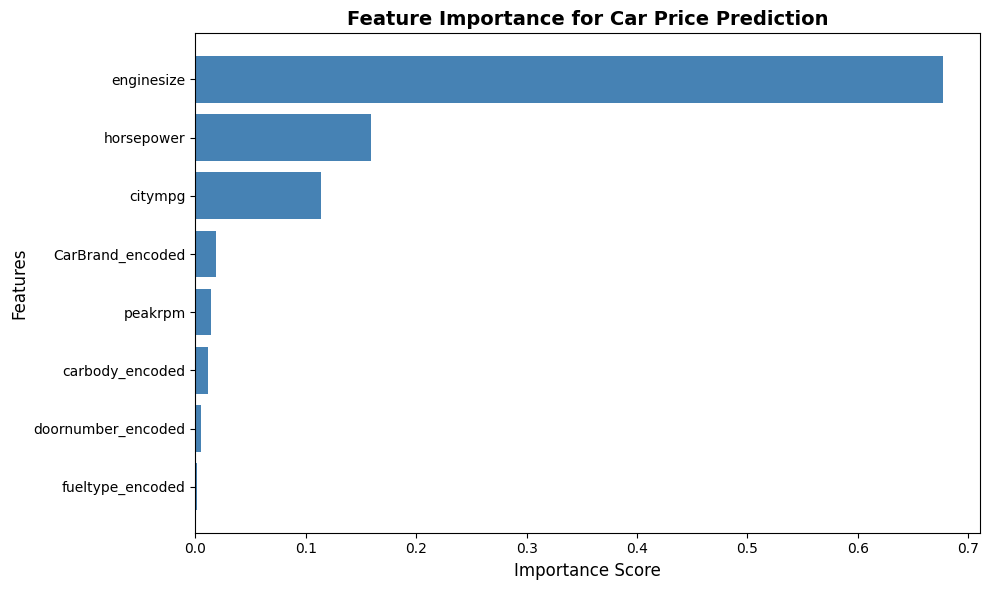

In [ ]:
print("\n" + "="*80)
print("[STEP 9] Feature Importance Analysis...")
print("="*80)

# Get the best model (Random Forest typically performs best)
best_model = trained_models[best_model_name]

# Check if model has feature_importances_
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n" + feature_importance.to_string(index=False))

    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Feature Importance for Car Price Prediction', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Feature importance plot saved as 'feature_importance.png'")
else:
    print(f"\n⚠ {best_model_name} does not support feature importance analysis")

In [ ]:
print("\n" + "="*80)
print("[STEP 10] Saving the Model...")
print("="*80)

# Save the best model
model_filename = 'car_price_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
print(f"✓ Best model saved as '{model_filename}'")

# Save encoders and mappings
mappings = {
    'fuel_mapping': fuel_mapping,
    'body_mapping': body_mapping,
    'door_mapping': door_mapping,
    'brand_mapping': brand_mapping,
    'feature_names': X.columns.tolist()
}

mappings_filename = 'feature_mappings.pkl'
with open(mappings_filename, 'wb') as file:
    pickle.dump(mappings, file)
print(f"✓ Feature mappings saved as '{mappings_filename}'")

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"✓ Model comparison results saved as 'model_comparison_results.csv'")


[STEP 10] Saving the Model...
✓ Best model saved as 'car_price_model.pkl'
✓ Feature mappings saved as 'feature_mappings.pkl'
✓ Model comparison results saved as 'model_comparison_results.csv'


In [ ]:
print("\n" + "="*80)
print("[STEP 11] Testing Predictions...")
print("="*80)

# Make sample predictions
print("\n→ Sample predictions from test set:")
sample_indices = np.random.choice(X_test.index, size=5, replace=False)

for idx in sample_indices:
    actual = y_test.loc[idx]
    features = X_test.loc[idx].values.reshape(1, -1)
    predicted = best_model.predict(features)[0]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100

    print(f"\n  Sample {idx}:")
    print(f"    Actual Price: ${actual:,.2f}")
    print(f"    Predicted Price: ${predicted:,.2f}")
    print(f"    Error: ${error:,.2f} ({error_pct:.2f}%)")


[STEP 11] Testing Predictions...

→ Sample predictions from test set:

  Sample 15:
    Actual Price: $30,760.00
    Predicted Price: $35,091.19
    Error: $4,331.19 (14.08%)

  Sample 116:
    Actual Price: $17,950.00
    Predicted Price: $15,065.13
    Error: $2,884.87 (16.07%)

  Sample 65:
    Actual Price: $18,280.00
    Predicted Price: $16,896.46
    Error: $1,383.54 (7.57%)

  Sample 147:
    Actual Price: $10,198.00
    Predicted Price: $10,454.34
    Error: $256.34 (2.51%)

  Sample 98:
    Actual Price: $8,249.00
    Predicted Price: $7,225.27
    Error: $1,023.73 (12.41%)


In [ ]:
# ==============================================================================
# STEP 12: MODEL SUMMARY
# ==============================================================================
print("\n" + "="*80)
print("MODEL IMPLEMENTATION SUMMARY")
print("="*80)

print(f"""
✓ Dataset: {df.shape[0]} cars with {len(selected_columns)-1} features
✓ Selected Features: {len(X.columns)} optimized columns
✓ Training Samples: {X_train.shape[0]}
✓ Testing Samples: {X_test.shape[0]}
✓ Best Model: {best_model_name}
✓ Best Test Accuracy: {best_score:.2f}%
✓ Model File: {model_filename}
✓ Mappings File: {mappings_filename}

📊 Key Features (in order of importance):
""")

if hasattr(best_model, 'feature_importances_'):
    for idx, row in feature_importance.iterrows():
        print(f"   {row['Feature']}: {row['Importance']*100:.2f}%")

print("\n" + "="*80)
print("✅ MODEL IMPLEMENTATION COMPLETED SUCCESSFULLY!")
print("="*80)


MODEL IMPLEMENTATION SUMMARY

✓ Dataset: 205 cars with 8 features
✓ Selected Features: 8 optimized columns
✓ Training Samples: 163
✓ Testing Samples: 41
✓ Best Model: Random Forest
✓ Best Test Accuracy: 91.43%
✓ Model File: car_price_model.pkl
✓ Mappings File: feature_mappings.pkl

📊 Key Features (in order of importance):

   enginesize: 67.69%
   horsepower: 15.93%
   citympg: 11.35%
   CarBrand_encoded: 1.88%
   peakrpm: 1.38%
   carbody_encoded: 1.11%
   doornumber_encoded: 0.47%
   fueltype_encoded: 0.19%

✅ MODEL IMPLEMENTATION COMPLETED SUCCESSFULLY!
